In [1]:
# Load some libraries for reading the data from the database and plotting 

import django
import sys, os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *

from django.db.models import Count, Sum

In [2]:
# get the query we are interested in -- 
q = Query.objects.get(pk=6027) 

# get the documents associated with the query
docs = Doc.objects.filter(query=q)

#how many documents do we have?
docs.count()

46703

In [3]:
# how many documents in each year?
by_year = docs.values('PY').annotate(
    n = Count('pk') # Count the pk - primary keys - of documents in each value of PY (year)
).order_by('PY')

# Put this into a dataframe
by_year_df = pd.DataFrame.from_dict(list(by_year)) # we have to wrap the queryset in a list, so pandas can read it properly
by_year_df.tail() # what do the last few rows look like?

,PY,n
54,2016.0,5078
55,2017.0,5475
56,2018.0,5227
57,2019.0,705
58,NaN,2


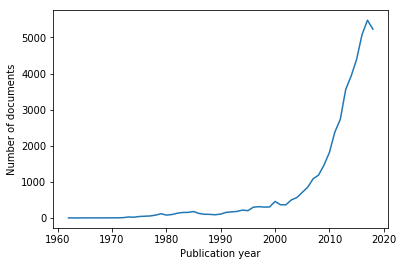

In [4]:
# make a plot!
by_year_df=by_year_df[(by_year_df['PY']<2019) & (by_year_df['PY']>1960)]
plt.plot(by_year_df['PY'],by_year_df['n'])
# Add some labels
plt.xlabel('Publication year')
plt.ylabel('Number of documents')

plt.savefig("plots/pubs_by_year.png")
plt.savefig("plots/pubs_by_year.svg")

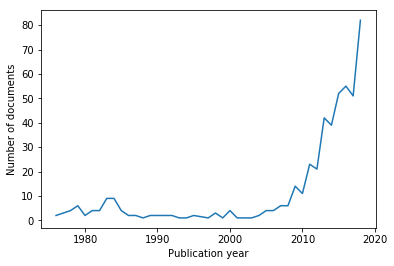

In [5]:
docs = Doc.objects.filter(query=q,docproject__project=47,docproject__relevant=1)
by_year = docs.values('PY').annotate(
    n = Count('pk') # Count the pk - primary keys - of documents in each value of PY (year)
).order_by('PY')

by_year_df = pd.DataFrame.from_dict(list(by_year))

by_year_df=by_year_df[(by_year_df['PY']<2019) & (by_year_df['PY']>1960)]
plt.plot(by_year_df['PY'],by_year_df['n'])
# Add some labels
plt.xlabel('Publication year')
plt.ylabel('Number of documents')

plt.savefig("plots/pubs_by_year_relevant.png")
plt.savefig("plots/pubs_by_year_relevant.svg")